## Twitter Dataset

In [ ]:
import jsonlines
import json

with jsonlines.open('../../../../Vaccine-Disinfo-Data/Twitter/vaers_2021_01_01_to_2021_08_01.json') as reader:
    tweets = list()
    for obj in reader:
        tweets.extend(obj["data"])
            
with open('./all_tweets.json', 'w', encoding='utf-8') as file_obj:
    json.dump(tweets, file_obj, ensure_ascii=False)    

In [ ]:
with open('./all_tweets.json') as f:
    data = json.load(f)
    
print(data)

### AstraZeneca dictionary

In [ ]:
import re

compiled_dictionary = re.compile(r"(?i)(AstraZeneca|Astra Zeneca|AZD1222|COVID|vaccine|immunity|herd immunity|Barrington|focused protection)" , flags=re.IGNORECASE)

In [ ]:
import jsonlines
import json
import re

with jsonlines.open('drive/MyDrive/vaers_2021_01_01_to_2021_08_01.json') as reader:
    url_list = list()
    for obj in reader:
      for o in obj["data"]:
        try:
          twt = o["text"]
          r1 = re.search(compiled_dictionary,twt)
          if r1 is not None:
            urls = [dict(url=url["expanded_url"],text=twt) for url in o["entities"]["urls"]]
            url_list.extend(urls)
        except Exception:
          pass

with open('./url_list.json', 'w', encoding='utf-8') as file_obj:
    json.dump(url_list, file_obj, ensure_ascii=False, indent=4)

#### Analysis of AstraZeneca keyword filtered dataset

In [6]:
import json

with open('../../data/VAERS_data/URLs for AstraZeneca Keywords/url list for astrazeneca.json') as f:
    data = json.load(f)

In [4]:
df = pd.DataFrame(data,columns=["url"])
df

,url
0,https://twitter.com/PressDoYourJob/status/1421...
1,https://t.me/Hyer971/4320
2,https://twitter.com/Drwealth54/status/14216194...
3,https://childrenshealthdefense.org/defender/va...
4,https://t.me/Hyer971/4320
...,...
77561,https://vaers.hhs.gov/esub/index.jsp
77562,https://ift.tt/2WYTD3M
77563,https://ift.tt/2WYTD3M
77564,https://twitter.com/critica18495985/status/134...


In [7]:
unique_urls = df.groupby(by="url").size().reset_index(name='count').sort_values("count",ascending=False)
unique_urls.to_csv("../../data/VAERS_data/URLs for AstraZeneca Keywords/unique_urls.csv",index=False)
unique_urls

,url,count
25183,https://www.openvaers.com/covid-data,1569
23364,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,1298
25678,https://www.thegatewaypundit.com/2021/06/shock...,1227
22894,https://wonder.cdc.gov/vaers.html,1130
22392,https://vaers.hhs.gov/,1123
...,...,...
10203,https://twitter.com/Justin365/status/141326717...,1
10202,https://twitter.com/JustaCountryGi8/status/141...,1
10201,https://twitter.com/JustaCountryGi8/status/141...,1
10200,https://twitter.com/Just_Cartooning/status/140...,1


In [10]:
from urllib.parse import urlparse

unique_urls["netloc"] = unique_urls["url"].apply(lambda x: urlparse(x).netloc)
unique_urls.to_csv("../../data/VAERS_data/URLs for AstraZeneca Keywords/unique_urls_with_netloc.csv",index=False)
unique_urls.sort_values("count",ascending=False)

,url,count,netloc
25183,https://www.openvaers.com/covid-data,1569,www.openvaers.com
23364,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,1298,www.cdc.gov
25678,https://www.thegatewaypundit.com/2021/06/shock...,1227,www.thegatewaypundit.com
22894,https://wonder.cdc.gov/vaers.html,1130,wonder.cdc.gov
22392,https://vaers.hhs.gov/,1123,vaers.hhs.gov
...,...,...,...
20554,https://twitter.com/realBryanCowger/status/141...,1,twitter.com
20555,https://twitter.com/realConnieBevan/status/140...,1,twitter.com
20556,https://twitter.com/realDaVincigal/status/1417...,1,twitter.com
20557,https://twitter.com/realDailyWire/status/14157...,1,twitter.com


In [17]:
unique_urls[["netloc"]].groupby(by="netloc").size().reset_index(name='count').sort_values("count",ascending=False)

,netloc,count
2114,twitter.com,43182
587,childrenshealthdefense.org,653
2967,www.medalerts.org,653
2300,wonder.cdc.gov,586
3556,youtu.be,379
...,...,...
1366,medianism.org,1
1368,medical.nikkeibp.co.jp,1
1369,medicaldialogues.in,1
1371,medicaltrend.org,1


## Analysis of unfiltered twitter dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 0)
InteractiveShell.ast_node_interactivity = "all"

In [11]:
import json

with open('../../data/VAERS_data/url_list.json') as f:
    data = json.load(f)

In [12]:
df = pd.DataFrame(data,columns=["url"])
df

,url
0,https://twitter.com/PressDoYourJob/status/1421...
1,https://twitter.com/val_ic/status/142156589791...
2,https://www.google.com/amp/s/mobile.reuters.co...
3,https://www.nebraskamed.com/COVID/does-vaers-l...
4,https://t.me/Hyer971/4320
...,...
240470,https://ift.tt/2WYTD3M
240471,https://ift.tt/2WYTD3M
240472,https://twitter.com/critica18495985/status/134...
240473,https://www.medalerts.org/vaersdb/findfield.ph...


In [13]:
unique_urls = df.groupby(by="url").size().reset_index(name='count').sort_values("count",ascending=False)
unique_urls.to_csv("../../data/VAERS_data/unique_urls.csv",index=False)
unique_urls

,url,count
53831,https://wonder.cdc.gov/vaers.html,5380
58043,https://www.openvaers.com/covid-data,5307
3705,https://childrenshealthdefense.org/defender/va...,3773
52938,https://vaers.hhs.gov/,3742
3378,https://childrenshealthdefense.org/defender/cd...,3702
...,...,...
23342,https://twitter.com/LonelyZeta/status/13926695...,1
23343,https://twitter.com/LongLiv04611701/status/141...,1
23344,https://twitter.com/LongLiv04611701/status/141...,1
23347,https://twitter.com/Long_GoldSilver/status/135...,1


In [14]:
from urllib.parse import urlparse

unique_urls["netloc"] = unique_urls["url"].apply(lambda x: urlparse(x).netloc)
unique_urls.to_csv("../../data/VAERS_data/unique_urls_with_netloc.csv",index=False)
unique_urls

,url,count,netloc
53831,https://wonder.cdc.gov/vaers.html,5380,wonder.cdc.gov
58043,https://www.openvaers.com/covid-data,5307,www.openvaers.com
3705,https://childrenshealthdefense.org/defender/va...,3773,childrenshealthdefense.org
52938,https://vaers.hhs.gov/,3742,vaers.hhs.gov
3378,https://childrenshealthdefense.org/defender/cd...,3702,childrenshealthdefense.org
...,...,...,...
23342,https://twitter.com/LonelyZeta/status/13926695...,1,twitter.com
23343,https://twitter.com/LongLiv04611701/status/141...,1,twitter.com
23344,https://twitter.com/LongLiv04611701/status/141...,1,twitter.com
23347,https://twitter.com/Long_GoldSilver/status/135...,1,twitter.com


In [16]:
unique_urls[["netloc"]].groupby(by="netloc").size().reset_index(name='count').sort_values("count",ascending=False)

,netloc,count
2114,twitter.com,43182
587,childrenshealthdefense.org,653
2967,www.medalerts.org,653
2300,wonder.cdc.gov,586
3556,youtu.be,379
...,...,...
1366,medianism.org,1
1368,medical.nikkeibp.co.jp,1
1369,medicaldialogues.in,1
1371,medicaltrend.org,1


In [ ]:
import re

compiled = re.compile(r".gov" , flags=re.IGNORECASE)

df_gov_filtered = df[~df["url"].str.contains(compiled)]

## VAERS Dataset analysis

In [2]:
vrsdata = pd.read_csv('../../../../Vaccine-Disinfo-Data/VAERS/2021VAERSData.csv',encoding='latin1',low_memory=False)
vrsdata.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [8]:
vrsvax = pd.read_csv('../../../../Vaccine-Disinfo-Data/VAERS/2021VAERSVAX.csv',encoding='latin1',low_memory=False)
vrsvax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [4]:
vrsdata["RECVDATE"] = pd.to_datetime(vrsdata["RECVDATE"])

In [6]:
vrsdata['RECVDATE'].value_counts()

2021-04-13    5741
2021-04-16    4562
2021-04-14    4545
2021-04-09    4133
2021-04-07    4127
2021-04-22    3990
2021-04-15    3984
2021-04-08    3930
2021-04-12    3896
2021-04-23    3784
2021-04-24    3717
2021-03-31    3717
2021-04-21    3713
2021-04-27    3685
2021-01-08    3656
2021-04-01    3585
2021-04-10    3555
2021-01-28    3535
2021-04-19    3508
2021-04-02    3331
2021-04-20    3262
2021-05-11    3255
2021-01-27    3253
2021-03-15    3134
2021-05-05    3132
2021-01-21    3127
2021-03-19    3105
2021-01-22    3098
2021-05-01    3089
2021-04-28    3086
2021-04-25    3083
2021-01-07    3070
2021-02-04    3049
2021-01-25    3039
2021-04-05    3033
2021-03-25    3029
2021-01-13    3004
2021-01-26    2988
2021-01-29    2967
2021-01-12    2910
2021-02-05    2900
2021-01-15    2897
2021-01-14    2894
2021-03-16    2872
2021-04-29    2871
2021-03-29    2851
2021-02-08    2829
2021-03-08    2806
2021-02-10    2806
2021-04-06    2789
2021-03-26    2788
2021-03-10    2777
2021-05-14  

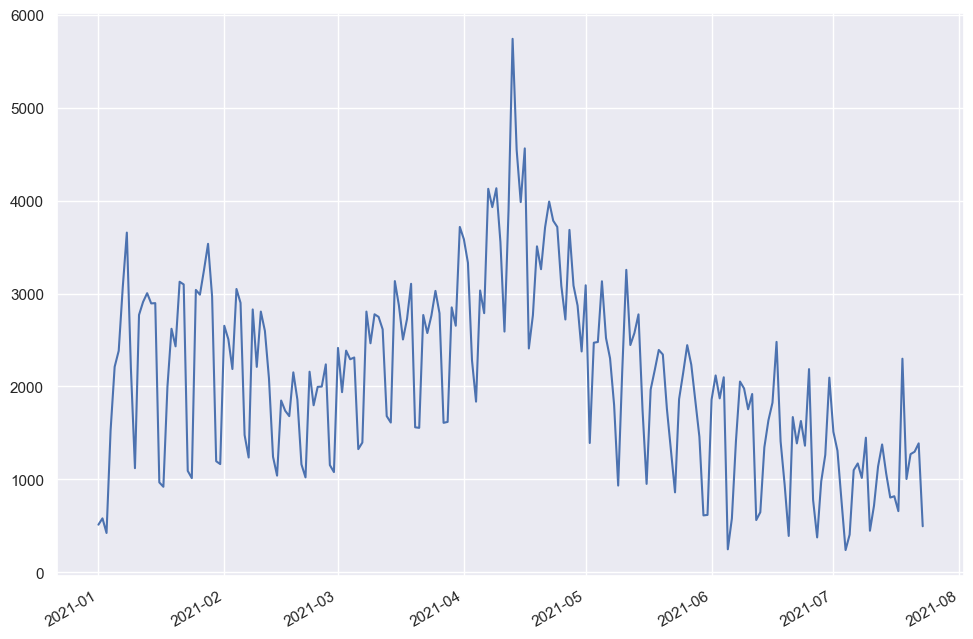

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = vrsdata['RECVDATE'].value_counts().plot(x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

In [7]:
import jsonlines
import json

with jsonlines.open('../../../../Vaccine-Disinfo-Data/Twitter/vaers_2021_01_01_to_2021_08_01.json') as reader:
    twts = list()
    for obj in reader:
      for o in obj["data"]:
        try:
          twts.append(dict(id=o["id"],time=o["created_at"]))
        except Exception:
          pass

In [8]:
tweetsdf = pd.DataFrame(twts)
tweetsdf["time"] = pd.to_datetime(tweetsdf["time"])
tweetsdf

,id,time
0,1421621648843710465,2021-07-31 23:59:48+00:00
1,1421621633291218944,2021-07-31 23:59:44+00:00
2,1421621557051281410,2021-07-31 23:59:26+00:00
3,1421621542480404481,2021-07-31 23:59:22+00:00
4,1421621536805449729,2021-07-31 23:59:21+00:00
...,...,...
727143,1344811013518966784,2021-01-01 01:01:45+00:00
727144,1344810463683461120,2021-01-01 00:59:34+00:00
727145,1344809796332097536,2021-01-01 00:56:55+00:00
727146,1344809262091038726,2021-01-01 00:54:48+00:00


In [9]:
tweetsdf['time'].value_counts()

2021-04-20 20:17:49+00:00    6
2021-07-21 11:37:58+00:00    6
2021-07-21 11:55:27+00:00    6
2021-07-21 11:59:28+00:00    6
2021-07-21 11:57:50+00:00    6
                            ..
2021-06-23 17:51:46+00:00    1
2021-06-23 17:51:16+00:00    1
2021-06-23 17:50:53+00:00    1
2021-06-23 17:50:31+00:00    1
2021-01-01 00:09:44+00:00    1
Name: time, Length: 696894, dtype: int64

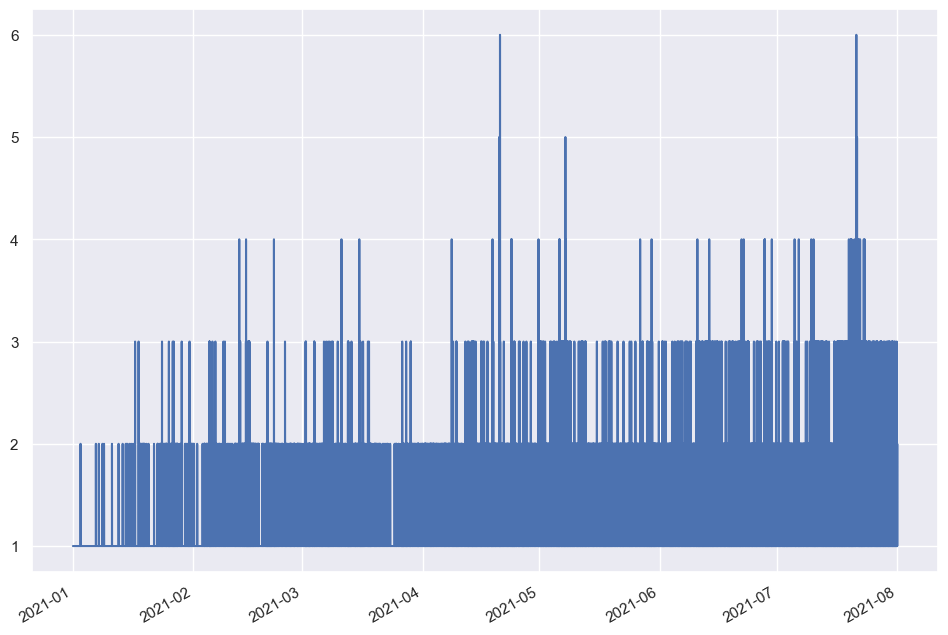

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = tweetsdf['time'].value_counts().plot(x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.show()